# Discrete Distributions


### Discrete Random Variables: 

#### Probability Mass Functions: 
Discrete random variables are characterized by their supports which take the form 
$$S_x = {u_1, u_2, ... u_k}$$

Every discrete random variable X has associated with it a probability mass function (PMF) $f_x : S_x \rightarrow [0, 1]$ defined by

$$f_x(x) = P(X = x), x \in S_x$$

----

When there are a few outcomes, its easy to estimate the probabilities of outcomes but this becomes more tedious as the number of outcomes increases.

#### Binomial distribution:
A binomial distribution measures the probabilities of the number of successes over a given number of trials with a specified probability of success in each try. 
In the simplest scenario of a coin toss (with a fair coin), 
where the probability of getting a head with each toss is 0.50 and there are a fifty trials (you flip the coin 50 times), the binomial distribution will measure the likelihood of getting anywhere from no heads in fifty tosses 
(very unlikely) to 25 heads (most likely) to 50 heads (also very unlikely). 
If the coin is fair, the binomial distribution will be symmetric, reflecting the even odds;
as the probabilities shift from even odds, the distribution will get more skewed. 
The figure rendered from the code cells below presents binomial distributions for two scenarios – 
one with 50% probability of success and one with a 20% probability of success.            

In [1]:
#Take a moment and read the information about this topic in R.
help(Binomial)

,x,y,class
,<dbl>,<dbl>,<chr>
1,1,0.000178406,y1 = 50%
2,2,0.001092737,y1 = 50%
3,3,0.004370946,y1 = 50%
4,4,0.012839654,y1 = 50%
5,5,0.029531204,y1 = 50%
6,6,0.055371008,y1 = 50%


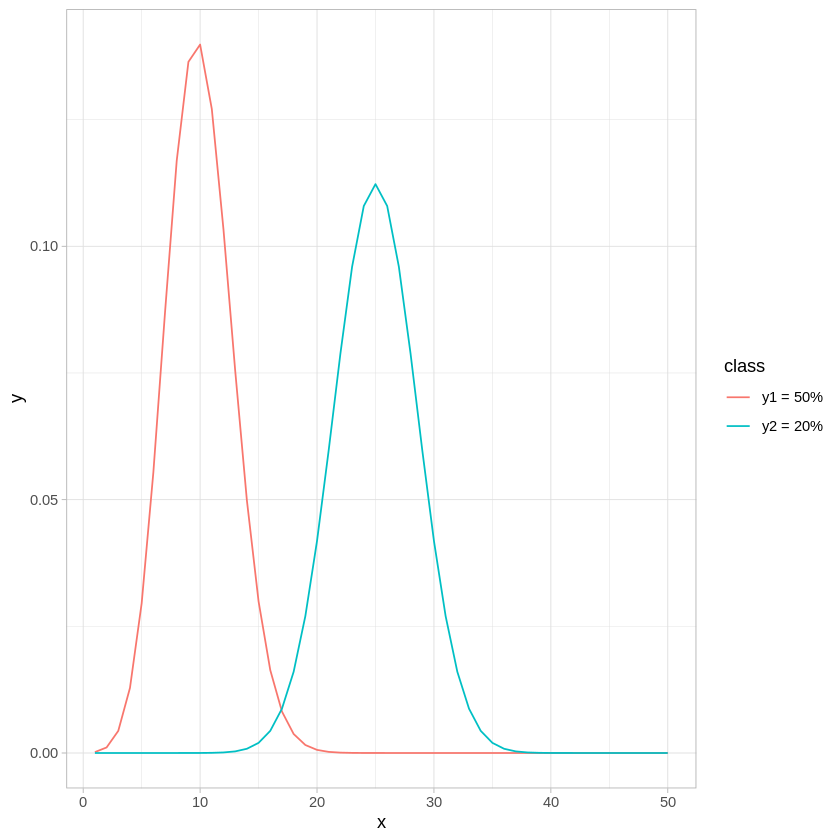

In [2]:
# install.packages("prob",repos="http://cran.us.r-project.org")
# library(prob)

# Generate a sequence (1 to 50) of quantiles. Each quantile is a possibility of 
#success, such as 1 head, 2 heads or 25 heads, etc. 
x <- seq(1,50,by=1)

# Generate probabilities for each quantile from 1 to 50 with the success probability as 
#0.2(unfair coin). There is a 20% chance of getting a head when a coin is tossed.
y1 <- dbinom(x,50,0.2)

# Generate probabilities for each quantile from 1 to 50 with success probability as 
#0.5(fair coin). There is a 50% chance of getting a head when a coin is tossed.
y2 <- dbinom(x,50,0.5)

# Create a dataframe for plotting
df <- data.frame(x=rep(x,2), y=c(y1, y2), class=c(rep("y1 = 50%", 50), rep("y2 = 20%", 50)))
head(df)

library(ggplot2)
ggplot(df, aes(x=x, y=y, color=class)) + geom_line() + theme_light()

As the probability of success varies (from 50%), the shape of the distribution will also shift, 
becoming positively skewed for probabilities less than 50% and negatively skewed for probabilities greater than 50%.

#### The Poisson Distribution
This is a distribution associated with “rare events”. The events might be:
1. traffic accidents
2. typing errors, or
3. customers arriving in a bank

Poisson distribution measures the likelihood of a number of events occurring within a given time interval, 
where the key parameter that is required is the average number of events in the given interval. 

**Note**: If X counts the number of events in the interval [0; t] and ${\lambda}$ is the average number that occurs in unit time, then `X ~ pois(lambda = $\lambda$t)`, that is,

$$P(X=x) = \mathrm{e}^{-{\lambda}t}  \frac{(\lambda t)^x}{x!}$$

**Example**: On the average, five cars arrive at a particular car wash every hour. Let X count the number of cars that arrive from 10AM to 11AM. Then `X ~ pois(lambda = 5)`. Also, $\mu$ = $\sigma^2$ = 5. What is the probability that no car arrives during this period?

**Solution**: The probability that no car arrives is
$$P(X=0) = \mathrm{e}^{-5}  \frac{(5)^0}{0!} = \mathrm{e}^{-5} = 0.0067$$

**Example: ** Suppose the car wash above is in operation from 8AM to 6PM, 
and we let Y be the number of customers that appear in this period.
Since this period covers a total of 10 hours, from above note we get that `Y ~ pois(lambda = 5 * 10 = 50)`.
What is the probability that there are between 48 and 50 customers, inclusive?

_Solution: _ We want... 
$$P(48 \le Y \le 50) = P(X \le 50) - P(X \le 47)$$
... Which is calculated below...

In [3]:
diff(ppois(c(47, 50), lambda = 50))

[1] 0.1678485

In [4]:
help(dpois)

,x,y,class
,<dbl>,<dbl>,<chr>
1,1,0.27067057,y1
2,2,0.27067057,y1
3,3,0.18044704,y1
4,4,0.09022352,y1
5,5,0.03608941,y1
6,6,0.01202980,y1


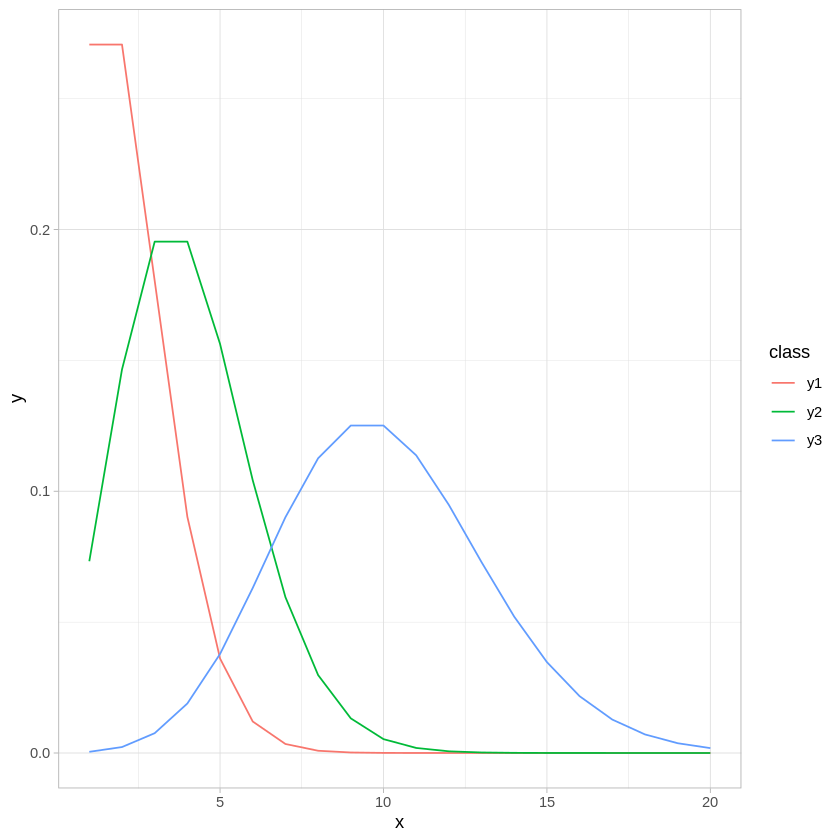

In [5]:
x <- seq(1,20,by=1)

# 2 events occuring in a time interval for a total of 20 events
y1 <- dpois(x,2)

# 4 events occuring in a time interval for a total of 20 events
y2 <- dpois(x,4)

# 10 events occuring in a time interval for a total of 20 events
y3 <- dpois(x,10)

# Create a dataframe for plotting
df <- data.frame(x=rep(x,3), y=c(y1, y2, y3), class=c(rep("y1", 20), rep("y2", 20), rep("y3", 20)))
head(df)

ggplot(df, aes(x=x, y=y, color=class)) + geom_line() + theme_light()

**Negative Binomial distribution**: 
Consider the coin toss example again.
Assume we hold the number of successes fixed at a given number and estimate the number of tries we will have before we reach the specified number of successes. 
The resulting distribution is called the negative binomial and it very closely resembles the Poisson. 
It will be more skewed to the right (positive values).

We can say that X has a Negative Binomial distribution and write `X ~ nbinom(size = r; prob = p)`. 
The associated R functions are `dnbinom(x, size, prob)`, `pnbinom`, `qnbinom`, and `rnbinom`, 
which calculate the PMF, CDF, and quantile function and simulate random variates, respectively.

**Question: ** We flip a coin repeatedly and let X count the number of Tails until we get seven
Heads. What is IP(X = 5)?

**Solution: ** We know that X ~ nbinom(size = 7; prob = 1/2). In R same can be produced as below...

In [6]:
dnbinom(5, size = 7, prob = 0.5)

[1] 0.112793

**Geometric distribution**: Consider the coin toss example again. 
Rather than focus on the number of successes in **n** trials, 
assume that you were measuring the likelihood of when the first success will occur. 
For example, with a fair coin toss, there is a 50% chance that the first success will occur at the first try, 
a 25% chance that it will occur on the second try and a 12.5% chance that it will occur on the third try. 
The resulting distribution is positively skewed. This is demonstrated below with following three different probability scenarios.

Suppose that we conduct [Bernoulli trials](https://en.wikipedia.org/wiki/Bernoulli_trial) repeatedly, noting the successes and failures. 
Let X be the number of failures before a success. If P(S) = p then X has PMF

$$f_x(x) = p(1 - p)^x, x = 0, 1, 2 . . . $$

We say that X has a Geometric distribution and we write `X ~ geom(prob = p)`. 
The associated R functions are `dgeom(x, prob)`, `pgeom`, `qgeom`, and `rhyper`,
which give the PMF, CDF, quantile function, and simulate random variates, respectively.

**Example: ** 
The Pittsburgh Steelers place kicker, Jeff Reed, made 81.2% of his attempted field goals in his career up to 2006.
Assuming that his successive field goal attempts approximately resemble Bernoulli trials, 
find the probability that Jeff misses at least 5 field goals before his first successful goal.

_Solution:_ 
If X = the number of missed goals until Jeff’s first success, then `X ~ geom(prob =0:812)` and we want $P(X \ge 5) = P(X > 4)$. We can find this in R with...

In [7]:
pgeom(4, prob = 0.812, lower.tail = FALSE)

[1] 0.0002348493

Some of the content and images are referred from the following [webpage](http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm) discussing Statistical Distributions. 